In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,Path().absolute().parents), None)
print(ROOT_DIR)
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(DATA_FOLDER)
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))

/mnt/nvme0n1p1/LLM_project2
/mnt/nvme0n1p1/ml_data_tre/LLM_project


In [3]:
dfnews = pd.read_parquet(DATA_FOLDER / "news_headlines_v3.2.parquet")

In [506]:
dfnews

headline  \
SYMBOL   DATE                                                                                                                                      
B00FG1-R 2016-01-13                                                 PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M  slides   
         2016-02-03                               PBF Logistics acquires four refined product terminals from Plains All American (PAA) for $100M   
         2016-03-31                                                             PBF Logistics announces 2.5M unit secondary offering through UBS   
         2016-04-20  FTC grants antitrust clearance for PBF Logistics' purchase of four refined product terminals from Plains All American (PAA)   
         2016-04-21                                                                             Raymond James initiates MPLX, PBFX, PSXP, others   
...                                                                                                                                          ...   
XR00QK-R 2018-08-29                                                           Playa Hotels & Resorts initiated buy at SunTrust Robinson Humphrey   
         2018-09-19                                                     Playa Hotels & Resorts downgraded to neutral from buy at Nomura/Instinet   
         2018-11-07                                                   Playa Hotels & Resorts reports Q3 adjusted EBITDA $26.0M vs FactSet $25.9M   
         2019-05-08                                                   Playa Hotels & Resorts reports Q1 adjusted EBITDA $74.8M vs FactSet $68.2M   
         2019-08-07                                                   Playa Hotels & Resorts reports Q2 adjusted EBITDA $40.1M vs FactSet $36.0M   

                     RET_5D_bin  RET_10D_bin  DES_MCAP_CCY  \
SYMBOL   DATE                                                
B00FG1-R 2016-01-13         0.0          0.0  3.573171e+05   
         2016-02-03         1.0          1.0  3.248169e+05   
         2016-03-31         1.0          1.0  3.485023e+05   
         2016-04-20         1.0          1.0  3.634857e+05   
         2016-04-21         1.0          1.0  3.625608e+05   
...                         ...          ...           ...   
XR00QK-R 2018-08-29         0.0          0.0  1.346543e+06   
         2018-09-19         0.0          0.0  1.199102e+06   
         2018-11-07         0.0          0.0  1.145606e+06   
         2019-05-08         0.0          0.0  1.105916e+06   
         2019-08-07         1.0          1.0  9.098357e+05   

                            DES_FACTSET_INDUSTRY     DES_FACTSET_SECTOR  \
SYMBOL   DATE                                                             
B00FG1-R 2016-01-13       Wholesale Distributors  Distribution Services   
         2016-02-03       Wholesale Distributors  Distribution Services   
         2016-03-31       Wholesale Distributors  Distribution Services   
         2016-04-20       Wholesale Distributors  Distribution Services   
         2016-04-21       Wholesale Distributors  Distribution Services   
...                                          ...                    ...   
XR00QK-R 2018-08-29  Hotels/Resorts/Cruise lines      Consumer Services   
         2018-09-19  Hotels/Resorts/Cruise lines      Consumer Services   
         2018-11-07  Hotels/Resorts/Cruise lines      Consumer Services   
         2019-05-08  Hotels/Resorts/Cruise lines      Consumer Services   
         2019-08-07  Hotels/Resorts/Cruise lines      Consumer Services   

                     DES_BETA_ADJ_104W  RET_5D_pos  RET_10D_pos  
SYMBOL   DATE                                                    
B00FG1-R 2016-01-13          -0.901957           0            0  
         2016-02-03          -0.888100           1            1  
         2016-03-31          -0.901134           1            1  
         2016-04-20          -0.920021           1            1  
         2016-04-21          -0.

In [507]:
from utils.io_utils import write_headlines_to_file

write_headlines_to_file(dfnews= dfnews, x_col = "headline", filepath = ROOT_DIR / "data_preprocess"/ "news_headlines_v3.2.txt")


In [508]:

dfnews["DATE_diff"] =( dfnews.reset_index().groupby("SYMBOL")["DATE"].diff().dt.days).values

In [5]:
def gen_news(dfnews, cols_add :list[str] = [], cols_remove:list[str] = []):
    cols  = ["DATE","headline"] + cols_add
    cols = [col for col in cols if col not in cols_remove]
    for i in range(0, dfnews.shape[0], 10):
        yield dfnews.reset_index().iloc[i:i+10].loc[:,cols]

gen = gen_news(dfnews)



In [510]:
# pd ste option max width 
pd.set_option('display.max_colwidth', 80)

next(gen)

,DATE,headline
0,2016-01-13,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides
1,2016-02-03,PBF Logistics acquires four refined product terminals from Plains All Americ...
2,2016-03-31,PBF Logistics announces 2.5M unit secondary offering through UBS
3,2016-04-20,FTC grants antitrust clearance for PBF Logistics' purchase of four refined p...
4,2016-04-21,"Raymond James initiates MPLX, PBFX, PSXP, others"
5,2016-04-29,PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increase...
6,2017-01-05,PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- inve...
7,2017-04-18,PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL)
8,2017-05-05,PBF Logistics reports Q1 Earnings Per Share $0.55 vs FactSet $0.52
9,2017-05-23,"U.S. Capital Advisors initiates HEP, HFC, MPC, others"


<Axes: title={'center': 'Distribution of time difference between news'}>

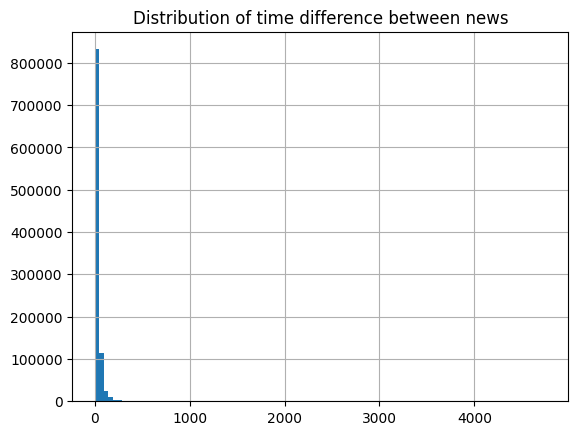

In [511]:
plt.title("Distribution of time difference between news")
dfnews.DATE_diff.dropna().hist(bins = 100)


In [512]:
# dfnews = dfnews.loc[dfnews.index.get_level_values(0).isin(dfnews.index.get_level_values(0).unique()[:3])] # REMOVE THIS CELL WHEN DONE DEBUGGING

<Axes: title={'center': 'Distribution of number of rows per symbol'}>

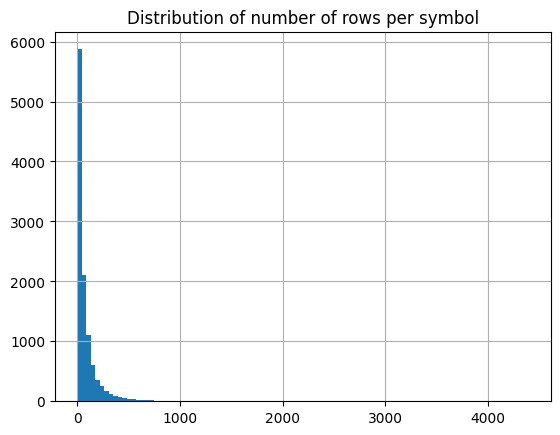

In [513]:
# number of rows per symbol distibution 
plt.title("Distribution of number of rows per symbol")
dfnews.groupby("SYMBOL")["RET_5D_pos"].count().hist(bins = 100)

### Merge Method 1

In [ ]:


def groupby_function_merge_headlines(df: pd.DataFrame):
    """
    Merges headlines for each week in the dataframe
    """
    resampled = df.reset_index().set_index("DATE").resample("7D").agg({"headline": lambda x: "; ".join(x)})["headline"]
    return resampled.shift(1)

print(f"number of symbols in df", dfnews.index.get_level_values(0).nunique())

headlines_merged = dfnews.groupby("SYMBOL").apply(groupby_function_merge_headlines)
headlines_merged = headlines_merged.loc[(headlines_merged != '' )].dropna()
headlines_merged.head(50)

headlines_merged_df = pd.DataFrame(headlines_merged)


In [515]:
headlines_merged_df

headline
SYMBOL   DATE                                                                                       
B00FG1-R 2016-01-20     PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M  slides
         2016-02-10  PBF Logistics acquires four refined product terminals from Plains All Americ...
         2016-04-06                 PBF Logistics announces 2.5M unit secondary offering through UBS
         2016-04-27  FTC grants antitrust clearance for PBF Logistics' purchase of four refined p...
         2016-05-04  PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increase...
...                                                                                              ...
XR00QK-R 2018-03-07  Playa Hotels & Resorts acquires 5 all-inclusive resorts and 2 adjacent ocean...
         2018-09-05               Playa Hotels & Resorts initiated buy at SunTrust Robinson Humphrey
         2018-09-26         Playa Hotels & Resorts downgraded to neutral from buy at Nomura/Instinet
         2018-11-14       Playa Hotels & Resorts reports Q3 adjusted EBITDA $26.0M vs FactSet $25.9M
         2019-05-15       Playa Hotels & Resorts reports Q1 adjusted EBITDA $74.8M vs FactSet $68.2M

[676974 rows x 1 columns]

In [516]:
dfnews_symbol0.reset_index().loc[:, [ "DATE","DATE_diff","headline"]]


,DATE,DATE_diff,headline
0,2016-01-13,NaN,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides
1,2016-02-03,21.0,PBF Logistics acquires four refined product terminals from Plains All Americ...
2,2016-03-31,57.0,PBF Logistics announces 2.5M unit secondary offering through UBS
3,2016-04-20,20.0,FTC grants antitrust clearance for PBF Logistics' purchase of four refined p...
4,2016-04-21,1.0,"Raymond James initiates MPLX, PBFX, PSXP, others"
5,2016-04-29,8.0,PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increase...
6,2017-01-05,251.0,PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- inve...
7,2017-04-18,103.0,PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL)
8,2017-05-05,17.0,PBF Logistics reports Q1 Earnings Per Share $0.55 vs FactSet $0.52
9,2017-05-23,18.0,"U.S. Capital Advisors initiates HEP, HFC, MPC, others"


In [517]:
# load price df to merge

dfprice = pd.read_parquet(DATA_FOLDER / "df_price_v0.1.parquet")


In [519]:
dfprice.shape


(4266319, 15)

In [47]:
headlines_merged_df2 = headlines_merged_df.reset_index().merge(dfprice, left_on = ["SYMBOL","DATE"] , right_on = ["SYMBOL-R", "DATE"] ,how = "inner")
headlines_merged_df2

,SYMBOL,DATE,headline,index,SYMBOL-R,exch_rate_sec_eur,p_price_adj_split_spinoff_div,DES_MCAP_CCY,factset_industry,factset_sector,DES_BETA_ADJ_104W,factset_entity_id,adj_price,RET_5D,RET_10D,RET_5D_pos,RET_10D_pos
0,B00M5L-R,2006-10-19,"Ultra Petroleum reports share repurchase plan, updates operations",7,B00M5L-R,0.793021,53.320000,8.114611e+06,Oil & Gas Production,Energy Minerals,-1.535250,0039F1-E,42.283902,0.097439,NaN,1,0
1,B00M5L-R,2006-10-26,"Ultra Petroleum provides update from development projects in Bohai Bay, China",12,B00M5L-R,0.787588,55.700000,8.476816e+06,Oil & Gas Production,Energy Minerals,-1.565611,0039F1-E,43.868630,0.037478,0.138569,1,1
2,B00M5L-R,2006-11-02,Ultra Petroleum reports Q3 Earnings Per Share $0.33 vs Reuters consensus $0.33,17,B00M5L-R,0.783085,51.490000,7.836109e+06,Oil & Gas Production,Energy Minerals,-1.645192,0039F1-E,40.321065,-0.080868,-0.046420,0,0
3,B00M5L-R,2007-02-22,Ultra Petroleum reports Q4 Earnings Per Share $0.38 vs Reuters consensus $0.38; Ultra Petroleum upgraded to buy from neutral at Goldman Sachs,97,B00M5L-R,0.761789,50.870000,7.729747e+06,Oil & Gas Production,Energy Minerals,-1.531483,0039F1-E,38.752190,-0.012364,-0.018127,0,0
4,B00M5L-R,2007-03-01,Ultra Petroleum estimates f07 production guidance of 110/bcfe--Bloomberg,102,B00M5L-R,0.759186,50.300000,7.641626e+06,Oil & Gas Production,Energy Minerals,-1.499946,0039F1-E,38.187063,-0.014583,-0.026767,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51222,XQCWLZ-R,2007-10-31,Tupperware reports Q3 Earnings Per Share $0.37 ex-items vs Reuters consensus $0.21,2860602,XQCWLZ-R,0.691372,22.945748,2.229753e+06,Miscellaneous Manufacturing,Producer Manufacturing,-0.397318,0012KJ-E,15.864041,0.033425,0.118784,1,1
51223,XQCWLZ-R,2007-11-28,Tupperware added to Focus List at JPMorgan,2860610,XQCWLZ-R,0.677874,22.386406,2.169622e+06,Miscellaneous Manufacturing,Producer Manufacturing,-0.429549,0012KJ-E,15.175167,0.088400,-0.020985,1,0
51224,XQCWLZ-R,2008-02-06,Tupperware reports Q4 adjusted Earnings Per Share $0.93 vs Reuters $0.80,2860632,XQCWLZ-R,0.683107,22.647663,2.180711e+06,Miscellaneous Manufacturing,Producer Manufacturing,-0.706312,0012KJ-E,15.470772,0.390062,0.116768,1,1
51225,XQDTCV-R,2006-11-29,Katy Industries divests UK plastics unit,2861659,XQDTCV-R,0.000817,24989.189717,1.326832e+10,Major Telecommunications,Communications,-0.521621,05DZG9-E,20.412598,-0.016978,0.040405,0,1


In [43]:
intersect = (set(headlines_merged_df.index.get_level_values(0)).intersection(set(dfprice["SYMBOL-R"].unique())).__len__())
print(f"number of symbols in intersection", intersect)
print(f"number of symbols in df", dfnews.index.get_level_values(0).nunique())
print(f"ratio of symbols in intersection to df {intersect/dfnews.index.get_level_values(0).nunique():.2f}")

number of symbols in intersection 6367
number of symbols in df 11100
ratio of symbols in intersection to df 0.57


In [48]:
print(f"rows final vs initial {headlines_merged_df2.shape[0]/headlines_merged_df.shape[0]:.2f}")



rows final vs initial 0.08


In [49]:
write_headlines_to_file(headlines_merged_df2,  filepath = "headline_merged.txt")

In [51]:
headlines_merged_df2.to_parquet(
    DATA_FOLDER / "headlines_merged_v5.parquet"
)
print(f"shape of final df {headlines_merged_df2.shape}")
print(f"number of symbols in df", dfnews.index.get_level_values(0).nunique())
print(f"number of unique dates in df", dfnews.index.get_level_values(1).nunique())
print(f"min date in df", dfnews.index.get_level_values(1).min())
print(f"max date in df", dfnews.index.get_level_values(1).max())

shape of final df (51227, 17)
number of symbols in df 11100
number of unique dates in df 4333
min date in df 2003-04-11 00:00:00
max date in df 2019-12-31 00:00:00


### Extracting Company Name

In [520]:
if "news_pickle" in locals():
    news_pickle.head()
    cols_remove = ["all_factset_entity_id", "fds_country","fds_subject","fds_language" ,"reference_story_headline",	"reference_story_id", "report_id",	"sa_category"	,"schema_version",	"senti_headline"	"senti_headline_no_ent"	"story_body"]
    cols_keep = [col for col in news_pickle.columns if col not in cols_remove]
    news_pickle = news_pickle[cols_keep]


First Try
- This does not work. It does not pick up every company name

In [211]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# List of news headlines
news_list = [
    "Aker BP releases presentation material in connection with its Capital Markets Day",
    "Ineos said to seek new terms for ConocoPhillips North Sea assets",
    "Mitsubishi Electric reports FY Earnings Per Share ¥109.32 vs FactSet ¥95.62",
    "ArQule reports Q1 Earnings Per Share ($0.09) vs FactSet ($0.08)"
]

def extract_company_name(news):
    doc = nlp(news)
    # Extract organizations from named entities and return them
    organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return ', '.join(organizations)  # Join multiple organizations with comma, if needed

# Extract company names for each news item
company_names = [extract_company_name(news) for news in news_list]
for news, company in zip(news_list, company_names):
    print(f"News: {news}\nCompany: {company}\n{'-'*50}")



News: Aker BP releases presentation material in connection with its Capital Markets Day
Company: Capital Markets Day
--------------------------------------------------
News: Ineos said to seek new terms for ConocoPhillips North Sea assets
Company: Ineos, ConocoPhillips North Sea
--------------------------------------------------
News: Mitsubishi Electric reports FY Earnings Per Share ¥109.32 vs FactSet ¥95.62
Company: Mitsubishi Electric, FY Earnings Per Share, FactSet
--------------------------------------------------
News: ArQule reports Q1 Earnings Per Share ($0.09) vs FactSet ($0.08)
Company: ArQule, FactSet
--------------------------------------------------


In [ ]:
write_headlines_to_file(dfnews= dfnews, x_col = "headline", filepath = ROOT_DIR / "data_preprocess"/ "news_headlines_v5.txt", limit = 1000000, step = 100, keep_date=False)

Second Try 
- This works, by picking up any Named Entity (Named Entity Recognition)

In [527]:
# get the first 100 symbols 
symbols = dfnews.index.get_level_values(0).unique()[:100]
dfnews1 = dfnews.loc[dfnews.index.get_level_values(0).isin(symbols)]

In [741]:
#dfnews is first 10 unique symbols of dfnews
# dfnews = dfnews.reset_index().set_index("SYMBOL").loc[dfnews.index.get_level_values(0).unique()[:30]]


dfnews = dfnews.reset_index().set_index(["SYMBOL","DATE"]).sort_index()
import spacy

nlp = spacy.load('en_core_web_sm')
from tqdm import tqdm

def get_company_name(symboldf):
    #symboldf is the result of the groupby SYMBOL function
    
    full_text_symbol = ". ".join(symboldf["headline"].values)
    #NER 
    compounds = []
    doc = nlp(full_text_symbol)
    # Extract compound nouns using noun chunks
    for chunk in doc.noun_chunks:
        compounds.append(chunk.text)

    from collections import Counter
    # Extract compound tokens
    # Count the most common tokens
    return next(filter(lambda x: len(x[0]) > 2, Counter(compounds).most_common(5)))[0]
    


In [747]:
dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_company_name.parquet")


In [757]:
from itertools import chain
for k in chain(Path().absolute().parents,[Path(os.getcwd())]):
    print(k)

/mnt/nvme0n1p1/LLM_project2
/mnt/nvme0n1p1
/mnt
/
/mnt/nvme0n1p1/LLM_project2/data_preprocess


In [758]:
%%writefile data_v5_company_name_operation.py
import os
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import chain
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,chain(Path().absolute().parents,[Path(os.getcwd())])), None)
print(f"ROOT_DIR {ROOT_DIR}")
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(f"DATA_FOLDER {DATA_FOLDER}")
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))
from pathlib import Path
from tqdm import tqdm
import spacy
from collections import Counter
from utils.io_utils import write_headlines_to_file
nlp = spacy.load('en_core_web_sm')
def get_company_name(symboldf):
    #symboldf is the result of the groupby SYMBOL function
    
    full_text_symbol = ". ".join(symboldf["headline"].values)
    #NER 
    compounds = []
    doc = nlp(full_text_symbol)
    # Extract compound nouns using noun chunks
    for chunk in doc.noun_chunks:
        compounds.append(chunk.text)

    # Extract compound tokens
    # Count the most common tokens
    return next(filter(lambda x: len(x[0]) > 2, Counter(compounds).most_common(5)))[0]

if __name__=="__main__":  
    dfnews=  pd.read_parquet(ROOT_DIR/ "temp/data_v5_company_name.parquet")
    tqdm.pandas()
    mapping = dfnews.groupby("SYMBOL").progress_apply(get_company_name) #each symbol gets a mapping
    dfnews["company_name"] = dfnews.index.get_level_values(0).map(mapping)
    # save the temp to temp/data_v5_company_name.parquet
    os.remove(ROOT_DIR/ "temp/data_v5_company_name.parquet")
    dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_company_name_done.parquet")
    write_headlines_to_file(dfnews= dfnews, x_col = "headline", add_cols=["company_name"],filepath = ROOT_DIR / "data_preprocess"/ "news_headlines_v5_company_name.txt", limit = 1000000, step = 100, keep_date=False)


Overwriting data_v5_company_name_operation.py


In [ ]:
from data_v5_company_name_operation import get_company_name

In [660]:
gen = gen_news(dfnews, cols_add = ["company_name"])

In [677]:
next(gen)

,DATE,headline,company_name
160,2004-12-08,OSTK downgraded to hold from buy at Legg Mason,Overstock.com
161,2004-12-30,"OSTK remains optimistic on future growth, reports Salt Lake Tribune",Overstock.com
162,2004-12-30,Follow-up: OSTK CEO Patrick Byrne's comments in Salt Lake City Tribune,Overstock.com
163,2005-01-13,"OSTK trading off recent lows, increase in EBAY listing fees cited",Overstock.com
164,2005-01-20,"OSTK current auction listings on website listed at 30,773",Overstock.com
165,2005-01-20,OSTK reports increase in auction listings since EBAY raised listing prices; ...,Overstock.com
166,2005-01-27,"OSTK announces 3-yr, up to $50M share repurchase plan",Overstock.com
167,2005-02-03,OSTK considering shelf registration for up to $500M of debt and equity,Overstock.com
168,2005-02-03,OSTK initiated market perform with a $45 target at Friedman Billings,Overstock.com
169,2005-03-02,Piper Jaffray comments on OSTK promotion; says revenue growth will be key to...,Overstock.com


### Try adding wikipedia Context 




In [6]:
path_dfnews_temp = ROOT_DIR/ "temp/data_v5_company_name_done.parquet"
if path_dfnews_temp.exists():
    dfnews = pd.read_parquet(path_dfnews_temp)


In [1073]:
dfnews = dfnews.loc[dfnews.index.get_level_values(0).isin(dfnews.index.get_level_values(0).unique()[:100])] # REMOVE THIS CELL WHEN DONE DEBUGGING


In [1074]:
dfnews.company_name

SYMBOL    DATE      
B00FG1-R  2016-01-13                            PBF Logistics
          2016-02-03                            PBF Logistics
          2016-03-31                            PBF Logistics
          2016-04-20                            PBF Logistics
          2016-04-21                            PBF Logistics
                                        ...                  
B4QW3V-R  2019-06-28                                  Astaldi
          2019-07-16                                  Astaldi
          2019-07-17                                  Astaldi
B4RX2T-R  2017-06-12    New York Times Sunday Edition Summary
B4VZMC-R  2019-12-12                                  Kiniksa
Name: company_name, Length: 8555, dtype: object

In [1075]:
import wikipediaapi
import spacy 
wiki_wiki = wikipediaapi.Wikipedia('DataV5', 'en')
def get_summary_company_name(company_name):
    nlp = spacy.load("en_core_web_sm")
    page_py = wiki_wiki.page(company_name)
    page_summary =  ' '.join([sent.text for sent in nlp(page_py.summary).sents][:3])
    if len(page_summary) < 5:
        if "Company" not in company_name:
            company_name = f"{company_name} Company"
            print(f"retrying with {company_name}")
            page_summary = get_summary_company_name(company_name)
        else: 
            return ""
    return page_summary


In [790]:

wikipediaapi.logging.getLogger().handlers = []
company_names = {}
from time import time
start = time()
for company_name in tqdm(dfnews["company_name"].unique()):
    company_names[company_name] = get_summary_company_name(company_name)
company_names
end = time()
print(f"len {len(dfnews.company_name.unique())} took {end-start:.2f} seconds")


  0%|          | 0/296 [00:00<?, ?it/s]

retrying with PBF Logistics Company


  0%|          | 1/296 [00:00<04:30,  1.09it/s]

retrying with Ultra Petroleum Company


  3%|▎         | 8/296 [00:04<02:26,  1.97it/s]

retrying with ArQule Company


  4%|▎         | 11/296 [00:06<02:37,  1.81it/s]

retrying with AngioDynamics Company


  5%|▌         | 16/296 [00:09<02:30,  1.85it/s]

retrying with Good Foods Company


  7%|▋         | 20/296 [00:12<02:57,  1.55it/s]

retrying with Apollo Medical Company


  8%|▊         | 23/296 [00:14<02:44,  1.66it/s]

retrying with Astral Foods Company


  8%|▊         | 25/296 [00:15<02:50,  1.59it/s]

retrying with Ampco-Pittsburgh Company


  9%|▉         | 28/296 [00:17<02:50,  1.57it/s]

retrying with NewMarket Company


 10%|█         | 30/296 [00:19<02:52,  1.54it/s]

retrying with Paratek Pharmaceuticals Company


 12%|█▏        | 35/296 [00:22<02:24,  1.80it/s]

retrying with McGrath RentCorp Company


 12%|█▏        | 36/296 [00:22<02:53,  1.50it/s]

retrying with K Services Company


 12%|█▎        | 37/296 [00:23<03:13,  1.34it/s]

retrying with Two Harbors Investment Company


 13%|█▎        | 38/296 [00:24<03:27,  1.24it/s]

retrying with Cambium Learning Company


 13%|█▎        | 39/296 [00:25<03:35,  1.19it/s]

retrying with M6-Metropole Company


 14%|█▍        | 42/296 [00:27<02:48,  1.51it/s]

retrying with Li Ning alters strategy Company


 15%|█▍        | 43/296 [00:28<03:06,  1.36it/s]

retrying with Luther Burbank Corp. Company


 15%|█▍        | 44/296 [00:29<03:20,  1.26it/s]

retrying with Outdoor Channel Holdings Company


 15%|█▌        | 45/296 [00:30<03:28,  1.20it/s]

retrying with American Dairy Company


 16%|█▌        | 47/296 [00:31<03:06,  1.33it/s]

retrying with Republic First Company


 16%|█▌        | 48/296 [00:32<03:17,  1.25it/s]

retrying with Skyline Champion Corp. Company


 17%|█▋        | 49/296 [00:33<03:25,  1.20it/s]

retrying with Parsley Energy Company


 17%|█▋        | 50/296 [00:34<03:31,  1.16it/s]

retrying with AtriCure Company


 17%|█▋        | 51/296 [00:35<03:35,  1.14it/s]

retrying with Krystal Biotech Company


 18%|█▊        | 53/296 [00:36<03:07,  1.30it/s]

retrying with ABB Limited Company


 18%|█▊        | 54/296 [00:37<03:17,  1.23it/s]

retrying with RAK Petroleum Company


 19%|█▊        | 55/296 [00:38<03:23,  1.18it/s]

retrying with all issued and outstanding shares Company


 19%|█▉        | 56/296 [00:39<03:31,  1.13it/s]

retrying with QMS Media Company


 21%|██▏       | 63/296 [00:43<02:13,  1.75it/s]

retrying with Japan banks Company


 22%|██▏       | 64/296 [00:44<02:37,  1.48it/s]

retrying with Sage Therapeutics Company


 22%|██▏       | 65/296 [00:45<02:54,  1.32it/s]

retrying with Valora Holding Company


 22%|██▏       | 66/296 [00:46<03:05,  1.24it/s]

retrying with XPEL Company


 23%|██▎       | 68/296 [00:47<02:49,  1.34it/s]

retrying with Peregrine Pharmaceuticals Company


 24%|██▍       | 72/296 [00:50<02:17,  1.63it/s]

retrying with Cannae Holdings, Inc. Company


 25%|██▌       | 75/296 [00:52<02:13,  1.66it/s]

retrying with Chesapeake Lodging Trust Company


 26%|██▌       | 77/296 [00:54<02:43,  1.34it/s]

retrying with ZTO Express Company


 28%|██▊       | 82/296 [00:57<01:59,  1.79it/s]

retrying with Carclo Company


 28%|██▊       | 84/296 [00:58<02:09,  1.63it/s]

retrying with Ziopharm Oncology Company


 29%|██▊       | 85/296 [00:59<02:29,  1.41it/s]

retrying with Novatek Microelectronics Corp. Company


 30%|██▉       | 88/296 [01:01<02:16,  1.53it/s]

retrying with Obagi Medical Products Company


 31%|███       | 91/296 [01:03<02:24,  1.42it/s]

retrying with Anoto Group Company


 32%|███▏      | 94/296 [01:05<02:14,  1.50it/s]

retrying with BlackPearl Resources Company


 32%|███▏      | 95/296 [01:06<02:29,  1.34it/s]

retrying with Sussex Bancorp Company


 32%|███▏      | 96/296 [01:07<02:39,  1.25it/s]

retrying with Applied Micro Company


 33%|███▎      | 98/296 [01:08<02:23,  1.38it/s]

retrying with New York Times Sunday Edition Summary Company


 33%|███▎      | 99/296 [01:09<02:33,  1.28it/s]

retrying with Kiniksa Company


 34%|███▍      | 102/296 [01:11<02:06,  1.53it/s]

retrying with Synlogic, Inc. Company


 35%|███▌      | 104/296 [01:13<02:04,  1.54it/s]

retrying with Jupai Holdings Company


 35%|███▌      | 105/296 [01:14<02:19,  1.37it/s]

retrying with Cotiviti Holdings Company


 36%|███▌      | 106/296 [01:14<02:28,  1.28it/s]

retrying with New China Life Insurance Co Company


 36%|███▌      | 107/296 [01:15<02:34,  1.22it/s]

retrying with Eiger BioPharmaceuticals Company


 37%|███▋      | 109/296 [01:17<02:16,  1.37it/s]

retrying with CPWR Company


 38%|███▊      | 112/296 [01:19<01:58,  1.55it/s]

retrying with Colony Starwood Homes Company


 41%|████      | 121/296 [01:24<01:29,  1.95it/s]

retrying with UNIQA Company


 41%|████      | 122/296 [01:25<01:50,  1.57it/s]

retrying with Maidenform Brands Company


 42%|████▏     | 124/296 [01:26<01:51,  1.55it/s]

retrying with (UK) Plc Company


 42%|████▏     | 125/296 [01:27<02:03,  1.38it/s]

retrying with OrganiGram Holdings, Inc. Company


 46%|████▌     | 135/296 [01:32<01:28,  1.81it/s]

retrying with Diaxonhit Company


 47%|████▋     | 140/296 [01:35<01:27,  1.78it/s]

retrying with Alexco Resource Company


 48%|████▊     | 141/296 [01:36<01:43,  1.50it/s]

retrying with Bluerock Residential Growth Company


 49%|████▊     | 144/296 [01:38<01:36,  1.58it/s]

retrying with Jastrzebska Company


 49%|████▉     | 145/296 [01:39<01:48,  1.39it/s]

retrying with Aldermore Group Company


 49%|████▉     | 146/296 [02:04<20:07,  8.05s/it]

retrying with Crestwood Midstream Partners LP Company


 50%|█████     | 149/296 [02:06<07:43,  3.15s/it]

retrying with The Cash Store Financial Services Company


 51%|█████     | 150/296 [02:07<06:02,  2.48s/it]

retrying with Astec Industries Company


 51%|█████     | 151/296 [02:08<04:52,  2.02s/it]

retrying with Barron's Asia Trader Company


 53%|█████▎    | 158/296 [02:12<01:29,  1.54it/s]

retrying with Alcoa Corp. Company


 54%|█████▍    | 161/296 [02:14<01:24,  1.61it/s]

retrying with Midea chairman/CEO Company


 55%|█████▍    | 162/296 [02:15<01:36,  1.38it/s]

retrying with Energous Corporation Company


 56%|█████▋    | 167/296 [02:18<01:12,  1.78it/s]

retrying with Seritage Growth Properties Company


 59%|█████▉    | 174/296 [02:22<01:02,  1.96it/s]

retrying with EPIQ Systems Company


 60%|██████    | 179/296 [02:25<01:06,  1.77it/s]

retrying with Genco Shipping Company


 61%|██████    | 181/296 [02:26<01:11,  1.61it/s]

retrying with Enerplus Corp Company


 62%|██████▏   | 184/296 [02:28<01:10,  1.58it/s]

retrying with Soffa Company


 62%|██████▎   | 185/296 [02:29<01:19,  1.40it/s]

retrying with aap Implantate Company


 63%|██████▎   | 186/296 [02:30<01:25,  1.28it/s]

retrying with PhotoCure Company


 63%|██████▎   | 187/296 [02:31<01:29,  1.22it/s]

retrying with Bohai Leasing Company


 64%|██████▎   | 188/296 [02:32<01:31,  1.18it/s]

retrying with Ur-Energy issues Company


 64%|██████▍   | 190/296 [02:33<01:19,  1.34it/s]

retrying with KalVista Pharmaceuticals Company


 66%|██████▌   | 195/296 [02:36<00:59,  1.70it/s]

retrying with China Yida Company


 66%|██████▌   | 196/296 [02:37<01:08,  1.47it/s]

retrying with Catering International Services Company


 67%|██████▋   | 198/296 [02:39<01:06,  1.47it/s]

retrying with Vestjysk Bank Company


 67%|██████▋   | 199/296 [02:40<01:12,  1.34it/s]

retrying with LMI Aerospace Company


 70%|██████▉   | 206/296 [02:44<00:49,  1.83it/s]

retrying with EDAG Engineering Group Company


 70%|███████   | 208/296 [02:45<00:54,  1.63it/s]

retrying with FMC Corp Company


 72%|███████▏  | 213/296 [02:48<00:45,  1.80it/s]

retrying with comdirect bank Company


 72%|███████▏  | 214/296 [02:49<00:54,  1.49it/s]

retrying with Kofax Ltd. Company


 73%|███████▎  | 215/296 [02:50<01:00,  1.33it/s]

retrying with Wihlborgs Fastigheter Company


 73%|███████▎  | 216/296 [02:51<01:03,  1.25it/s]

retrying with Rella Holding Company


 74%|███████▎  | 218/296 [02:53<01:00,  1.29it/s]

retrying with Luceco Company


 74%|███████▍  | 220/296 [02:54<00:55,  1.37it/s]

retrying with Precise Biometrics Company


 75%|███████▌  | 223/296 [02:56<00:46,  1.57it/s]

retrying with Probiodrug Company


 76%|███████▋  | 226/296 [02:58<00:42,  1.64it/s]

retrying with Argonaut Gold Company


 77%|███████▋  | 227/296 [02:59<00:48,  1.41it/s]

retrying with Republic Bancorp Inc/KY Company


 78%|███████▊  | 232/296 [03:02<00:36,  1.77it/s]

retrying with WILEX Company


 79%|███████▊  | 233/296 [03:03<00:42,  1.50it/s]

retrying with China Medical System Holdings Company


 79%|███████▉  | 234/296 [03:04<00:46,  1.33it/s]

retrying with Birchcliff Energy Company


 79%|███████▉  | 235/296 [03:05<00:49,  1.24it/s]

retrying with Steinway Musical Company


 81%|████████  | 240/296 [03:08<00:34,  1.63it/s]

retrying with Meridian Bancorp Company


 82%|████████▏ | 242/296 [03:09<00:34,  1.58it/s]

retrying with Shanda Interactive Company


 83%|████████▎ | 246/296 [03:12<00:28,  1.73it/s]

retrying with equinet Bank AG Company


 83%|████████▎ | 247/296 [03:12<00:33,  1.46it/s]

retrying with Dalradian Resources Company


 84%|████████▍ | 248/296 [03:13<00:36,  1.32it/s]

retrying with Banca Sistema Company


 84%|████████▍ | 249/296 [03:14<00:38,  1.23it/s]

retrying with Ply Gem Company


 84%|████████▍ | 250/296 [03:15<00:38,  1.18it/s]

retrying with American Residential Properties Company


 85%|████████▍ | 251/296 [03:16<00:38,  1.16it/s]

retrying with Basware Company


 85%|████████▌ | 252/296 [03:17<00:38,  1.13it/s]

retrying with Alibaba's logistics affiliate Company


 85%|████████▌ | 253/296 [03:18<00:38,  1.12it/s]

retrying with Viemed Healthcare Company


 86%|████████▌ | 255/296 [03:19<00:32,  1.28it/s]

retrying with Harris Teeter Supermarkets Company


 86%|████████▋ | 256/296 [03:20<00:33,  1.20it/s]

retrying with Myers Industries Company


 88%|████████▊ | 259/296 [03:22<00:26,  1.39it/s]

retrying with Southwest Bancorp Company


 88%|████████▊ | 261/296 [03:24<00:25,  1.36it/s]

retrying with Grupo Empresarial Ence Company


 89%|████████▊ | 262/296 [03:25<00:27,  1.24it/s]

retrying with Himax Technologies Company


 89%|████████▉ | 264/296 [03:27<00:24,  1.32it/s]

retrying with Equinox Gold Corp. Company


 91%|█████████ | 268/296 [03:29<00:16,  1.66it/s]

retrying with Athene Holding Company


 92%|█████████▏| 273/296 [03:32<00:14,  1.62it/s]

retrying with LOJN Company


 93%|█████████▎| 276/296 [03:34<00:12,  1.58it/s]

retrying with Independence Group NL Company


 94%|█████████▎| 277/296 [03:35<00:13,  1.38it/s]

retrying with Ingenia Communities Company


 94%|█████████▍| 278/296 [03:36<00:14,  1.27it/s]

retrying with Sanan Optoelectronics Company


 95%|█████████▌| 282/296 [03:38<00:08,  1.67it/s]

retrying with Aclaris Therapeutics Company


 96%|█████████▋| 285/296 [03:40<00:06,  1.61it/s]

retrying with Theratechnologies Company


 97%|█████████▋| 287/296 [03:42<00:05,  1.56it/s]

retrying with Barclays Group Africa Company


 97%|█████████▋| 288/296 [03:43<00:05,  1.37it/s]

retrying with Prelios Group Company


 98%|█████████▊| 289/296 [03:44<00:05,  1.27it/s]

retrying with ANF Immobilier Company


 98%|█████████▊| 291/296 [03:45<00:03,  1.39it/s]

retrying with Vanda Pharmaceuticals Company


 99%|█████████▉| 294/296 [03:47<00:01,  1.51it/s]

retrying with FormFactor Company


100%|██████████| 296/296 [03:49<00:00,  1.29it/s]

len 296 took 229.04 seconds


In [1076]:
from concurrent.futures import ThreadPoolExecutor
wikipediaapi.logging.getLogger().handlers = []
from time import time
start = time()
company_names = {}
with ThreadPoolExecutor(max_workers=10) as executor:
    for company_name in tqdm(dfnews["company_name"].unique()):
        compay_name_future = executor.submit(get_summary_company_name, company_name)
        company_names[company_name] = compay_name_future.result()
end = time()
print(f"len {len(dfnews.company_name.unique())} took {end-start:.2f} seconds")
dfnews["company_context"] = dfnews["company_name"].apply(lambda x: company_names[x])

gen = gen_news(dfnews, cols_add=["company_context"])

  0%|          | 0/100 [00:00<?, ?it/s]

retrying with PBF Logistics Company


  1%|          | 1/100 [00:00<01:37,  1.01it/s]

retrying with Ultra Petroleum Company


  8%|▊         | 8/100 [00:04<00:46,  1.99it/s]

retrying with ArQule Company


 11%|█         | 11/100 [00:06<00:48,  1.84it/s]

retrying with AngioDynamics Company


 16%|█▌        | 16/100 [00:09<00:45,  1.86it/s]

retrying with Good Foods Company


 20%|██        | 20/100 [00:12<00:51,  1.55it/s]

retrying with Apollo Medical Company


 23%|██▎       | 23/100 [00:14<00:46,  1.65it/s]

retrying with Astral Foods Company


 25%|██▌       | 25/100 [00:15<00:47,  1.58it/s]

retrying with Ampco-Pittsburgh Company


 28%|██▊       | 28/100 [00:17<00:45,  1.59it/s]

retrying with NewMarket Company


 30%|███       | 30/100 [00:19<00:44,  1.56it/s]

retrying with Paratek Pharmaceuticals Company


 35%|███▌      | 35/100 [00:21<00:34,  1.87it/s]

retrying with McGrath RentCorp Company


 36%|███▌      | 36/100 [00:22<00:41,  1.54it/s]

retrying with K Services Company


 37%|███▋      | 37/100 [00:23<00:46,  1.36it/s]

retrying with Two Harbors Investment Company


 38%|███▊      | 38/100 [00:24<00:48,  1.27it/s]

retrying with Cambium Learning Company


 39%|███▉      | 39/100 [00:25<00:50,  1.21it/s]

retrying with M6-Metropole Company


 42%|████▏     | 42/100 [00:27<00:38,  1.52it/s]

retrying with Li Ning alters strategy Company


 43%|████▎     | 43/100 [00:28<00:42,  1.35it/s]

retrying with Luther Burbank Corp. Company


 44%|████▍     | 44/100 [00:29<00:44,  1.26it/s]

retrying with Outdoor Channel Holdings Company


 45%|████▌     | 45/100 [00:30<00:45,  1.21it/s]

retrying with American Dairy Company


 47%|████▋     | 47/100 [00:31<00:41,  1.29it/s]

retrying with Republic First Company


 48%|████▊     | 48/100 [00:32<00:42,  1.23it/s]

retrying with Skyline Champion Corp. Company


 49%|████▉     | 49/100 [00:33<00:43,  1.18it/s]

retrying with Parsley Energy Company


 50%|█████     | 50/100 [00:34<00:43,  1.16it/s]

retrying with AtriCure Company


 51%|█████     | 51/100 [00:35<00:43,  1.14it/s]

retrying with Krystal Biotech Company


 53%|█████▎    | 53/100 [00:36<00:36,  1.28it/s]

retrying with ABB Limited Company


 54%|█████▍    | 54/100 [00:37<00:37,  1.22it/s]

retrying with RAK Petroleum Company


 55%|█████▌    | 55/100 [00:38<00:38,  1.18it/s]

retrying with all issued and outstanding shares Company


 56%|█████▌    | 56/100 [00:39<00:38,  1.15it/s]

retrying with QMS Media Company


 63%|██████▎   | 63/100 [00:43<00:20,  1.82it/s]

retrying with Japan banks Company


 64%|██████▍   | 64/100 [00:44<00:23,  1.52it/s]

retrying with Sage Therapeutics Company


 65%|██████▌   | 65/100 [00:45<00:25,  1.37it/s]

retrying with Valora Holding Company


 66%|██████▌   | 66/100 [00:46<00:26,  1.28it/s]

retrying with XPEL Company


 68%|██████▊   | 68/100 [00:47<00:22,  1.40it/s]

retrying with Peregrine Pharmaceuticals Company


 72%|███████▏  | 72/100 [00:50<00:17,  1.56it/s]

retrying with Cannae Holdings, Inc. Company


 75%|███████▌  | 75/100 [00:52<00:14,  1.68it/s]

retrying with Chesapeake Lodging Trust Company


 77%|███████▋  | 77/100 [00:53<00:15,  1.51it/s]

retrying with ZTO Express Company


 82%|████████▏ | 82/100 [00:56<00:09,  1.86it/s]

retrying with Carclo Company


 84%|████████▍ | 84/100 [00:57<00:09,  1.69it/s]

retrying with Ziopharm Oncology Company


 85%|████████▌ | 85/100 [00:58<00:10,  1.46it/s]

retrying with Novatek Microelectronics Corp. Company


 88%|████████▊ | 88/100 [01:00<00:07,  1.56it/s]

retrying with Obagi Medical Products Company


 91%|█████████ | 91/100 [01:02<00:06,  1.50it/s]

retrying with Anoto Group Company


 94%|█████████▍| 94/100 [01:04<00:03,  1.62it/s]

retrying with BlackPearl Resources Company


 95%|█████████▌| 95/100 [01:05<00:03,  1.41it/s]

retrying with Sussex Bancorp Company


 96%|█████████▌| 96/100 [01:06<00:03,  1.30it/s]

retrying with Applied Micro Company


 98%|█████████▊| 98/100 [01:07<00:01,  1.42it/s]

retrying with New York Times Sunday Edition Summary Company


 99%|█████████▉| 99/100 [01:08<00:00,  1.31it/s]

retrying with Kiniksa Company


100%|██████████| 100/100 [01:09<00:00,  1.44it/s]

len 100 took 69.64 seconds


In [1077]:


next(gen)



,DATE,headline,company_context
0,2016-01-13,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides,
1,2016-02-03,PBF Logistics acquires four refined product terminals from Plains All Americ...,
2,2016-03-31,PBF Logistics announces 2.5M unit secondary offering through UBS,
3,2016-04-20,FTC grants antitrust clearance for PBF Logistics' purchase of four refined p...,
4,2016-04-21,"Raymond James initiates MPLX, PBFX, PSXP, others",
5,2016-04-29,PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increase...,
6,2017-01-05,PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- inve...,
7,2017-04-18,PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL),
8,2017-05-05,PBF Logistics reports Q1 Earnings Per Share $0.55 vs FactSet $0.52,
9,2017-05-23,"U.S. Capital Advisors initiates HEP, HFC, MPC, others",


In [1078]:
dfnews.company_name.unique()
sorted(dfnews.company_name.unique(), key = lambda x: len(x), reverse = False)
sorted_company_names = sorted(dfnews.company_name.unique(), key = lambda x: len(x), reverse = False)
from itertools import islice
for k in islice(sorted_company_names,10):
    print(k)


ERG
KKR
XPEL
Saras
China
Sorin
VARTA
ArQule
CalAmp
Carclo


In [1079]:
%%writefile data_v5_company_context.py
import os
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import chain
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,chain(Path().absolute().parents,[Path(os.getcwd())])), None)
print(f"ROOT_DIR {ROOT_DIR}")
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(f"DATA_FOLDER {DATA_FOLDER}")
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))
from pathlib import Path
from tqdm import tqdm
import spacy
from collections import Counter
from utils.io_utils import write_headlines_to_file
from concurrent.futures import ThreadPoolExecutor
import wikipediaapi
from time import time
wikipediaapi.logging.getLogger().handlers = []
import spacy 
wiki_wiki = wikipediaapi.Wikipedia('DataV5', 'en')
def get_summary_company_name(company_name):
    nlp = spacy.load("en_core_web_sm")
    page_py = wiki_wiki.page(company_name)
    page_summary =  ' '.join([sent.text for sent in nlp(page_py.summary).sents][:3])
    if len(page_summary) < 5:
        if "Company" not in company_name:
            company_name = f"{company_name} Company"
            print(f"retrying with {company_name}")
            page_summary = get_summary_company_name(company_name)
        else: 
            return ""
    return page_summary

dfnews = pd.read_parquet(ROOT_DIR/ "temp/data_v5_company_name_done.parquet")
start = time()
company_names = {}
with ThreadPoolExecutor(max_workers=10) as executor:
    for company_name in tqdm(dfnews["company_name"].unique()):
        compay_name_future = executor.submit(get_summary_company_name, company_name)
        company_names[company_name] = compay_name_future.result()
end = time()
print(f"len {len(dfnews.company_name.unique())} summaries took {end-start:.2f} seconds")
dfnews["company_context"] = dfnews["company_name"].apply(lambda x: company_names[x])
dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_company_context_done.parquet")

Overwriting data_v5_company_context.py


### Rolling Window with two pointers

In [502]:
quick_test = False
if quick_test:
    lp  = 0
    rp = 0
    df = pd.DataFrame(np.arange(10))
    df["concat"] = "None"
    print(df)
    while rp < df.shape[0]: 
        print(f"rp = {rp}, lp = {lp}")
        if rp - lp <= 3: 
            df.iloc[rp, -1] = " ".join(df.iloc[lp:rp+1,0].astype(str).values)
            rp += 1
        else:
            lp += 1

    # same thing but with dfnews symbol0
    dfnews_symbol0["concat"] = "None"
    lp = 0 
    rp = 0 

    while rp < dfnews_symbol0.shape[0]: 
        print(dfnews_symbol0.iloc[lp:rp]["headline"].astype(str).values)
        if rp> 5:
            break
        if rp - lp <= 3: 
            dfnews_symbol0.iloc[rp, -1] = "\n-".join(dfnews_symbol0.iloc[lp:rp]["headline"].astype(str).values)
            rp += 1
        else:
            lp += 1


In [16]:
path_dfnews = ROOT_DIR/ "temp/data_v5_company_context_done.parquet" 
if not path_dfnews.exists():
    print(f"file {path_dfnews} does not exist")
    print("taking the next best thing")
    path_dfnews = ROOT_DIR/ "temp/data_v5_company_name_done.parquet"

assert path_dfnews.exists()
dfnews = pd.read_parquet(path_dfnews)

In [28]:
dfnews.shape

(1002870, 12)

In [1082]:

def apply_function(df:pd.DataFrame):
    #apply this on the df after the groupby 
    lp = 0
    rp = 0
    concats = pd.Series(["_"] *df.shape[0], index = df.index)
    while rp < df.shape[0]: 
        if rp - lp <= 3: 
            concats.iloc[rp] = ("\n-".join(df.iloc[lp:rp]["headline"].astype(str).values))
            rp += 1
        else:
            lp += 1
    return concats
dfnews["context_news"] = "None"
dfnews = dfnews.reset_index().set_index(["SYMBOL","DATE"]).sort_index()
dfnews["context_news"] = dfnews.groupby("SYMBOL").apply(apply_function).reset_index(level= 0, drop = True)
dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_context_news_done.parquet")

In [30]:
path_df_news_context_done = ROOT_DIR/ "temp/data_v5_company_context_done.parquet"
dfnews_post_wikipedia = pd.read_parquet(path_df_news_context_done)
print(f"shape of dfnews_post_wikipedia {dfnews_post_wikipedia.shape}")
print(f"columns of dfnews_post_wikipedia {dfnews_post_wikipedia.columns}")

shape of dfnews_post_wikipedia (1002870, 12)
columns of dfnews_post_wikipedia Index(['headline', 'RET_5D_bin', 'RET_10D_bin', 'DES_MCAP_CCY',
       'DES_FACTSET_INDUSTRY', 'DES_FACTSET_SECTOR', 'DES_BETA_ADJ_104W',
       'RET_5D_pos', 'RET_10D_pos', 'DATE_diff', 'company_name',
       'company_context'],
      dtype='object')


In [34]:
%%writefile data_preprocess/data_v5/data_v5_concat_news.py
import os
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import chain
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,chain(Path().absolute().parents,[Path(os.getcwd())])), None)
print(f"ROOT_DIR {ROOT_DIR}")
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(f"DATA_FOLDER {DATA_FOLDER}")
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))
from pathlib import Path
from time import time
from utils.io_utils import write_headlines_to_file
from tqdm import tqdm
def apply_function(df:pd.DataFrame):
    #apply this on the df after the groupby 
    lp = 0
    rp = 0
    concats = pd.Series(["_"] *df.shape[0], index = df.index)
    while rp < df.shape[0]: 
        if rp - lp <= 3: 
            concats.iloc[rp] = ("\n-".join(df.iloc[lp:rp]["headline"].astype(str).values))
            rp += 1
        else:
            lp += 1
    return concats

if __name__=="__main__":
    path_df_news_context_done = ROOT_DIR/ "temp/data_v5_company_context_done.parquet"
    if not path_df_news_context_done.exists():
        raise Exception("run data_v5_company_context.py first")
    start = time()
    dfnews = pd.read_parquet(path_df_news_context_done)
    # dfnews = dfnews.loc[dfnews.index.get_level_values(0).isin(dfnews.index.get_level_values(0).unique()[:30])] # REMOVE THIS CELL WHEN DONE DEBUGGING
    dfnews = dfnews.reset_index().set_index(["SYMBOL","DATE"]).sort_index()
    dfnews["news_context"] = "None"
    tqdm.pandas()
    dfnews["news_context"] = dfnews.groupby("SYMBOL").progress_apply(apply_function).reset_index(level= 0, drop = True)
    print(f"headlines concat finished in {time()-start:.2f} seconds")
    dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_context_news_done.parquet")
    write_headlines_to_file(dfnews= dfnews, x_col = "context", add_cols=["company_name","news_context"], filepath = ROOT_DIR / "data_preprocess"/ "news_headlines_v5_concat.txt", limit = 1000000, step = 100, keep_date=False)
    print(f"done")

Overwriting data_preprocess/data_v5/data_v5_concat_news.py


In [35]:
path_df_news_context_done = ROOT_DIR/ "temp/data_v5_context_news_done.parquet"
dfnews_post_wikipedia = pd.read_parquet(path_df_news_context_done)
print(f"shape of dfnews_post_wikipedia {dfnews_post_wikipedia.shape}")
print(f"columns of dfnews_post_wikipedia {dfnews_post_wikipedia.columns}")

shape of dfnews_post_wikipedia (1002870, 13)
columns of dfnews_post_wikipedia Index(['headline', 'RET_5D_bin', 'RET_10D_bin', 'DES_MCAP_CCY',
       'DES_FACTSET_INDUSTRY', 'DES_FACTSET_SECTOR', 'DES_BETA_ADJ_104W',
       'RET_5D_pos', 'RET_10D_pos', 'DATE_diff', 'company_name',
       'company_context', 'news_context'],
      dtype='object')


In [40]:
dfnews_post_wikipedia.sample(50)["company_context"].values
print(f"shape of dfnews_post_wikipedia {dfnews_post_wikipedia.shape}")
print(f"number of symbols in df", dfnews_post_wikipedia.index.get_level_values(0).nunique())
print(f"min date in df", dfnews_post_wikipedia.index.get_level_values(1).min())
print(f"max date in df", dfnews_post_wikipedia.index.get_level_values(1).max())

shape of dfnews_post_wikipedia (1002870, 13)
number of symbols in df 11100
min date in df 2003-04-11 00:00:00
max date in df 2019-12-31 00:00:00


In [24]:
gen = gen_news(dfnews, cols_add=["news_context"])

In [25]:
pd.set_option('display.max_colwidth', 300)
next(gen)

,DATE,headline,news_context
0,2016-01-13,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides,
1,2016-02-03,PBF Logistics acquires four refined product terminals from Plains All American (PAA) for $100M,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides
2,2016-03-31,PBF Logistics announces 2.5M unit secondary offering through UBS,PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides\n-PBF Logistics acquires four refined product terminals from Plains All American (PAA) for $100M
3,2016-04-20,FTC grants antitrust clearance for PBF Logistics' purchase of four refined product terminals from Plains All American (PAA),PBF Logistics guides FY (Dec 2016) Revenue $143.5 vs FactSet $145.8M slides\n-PBF Logistics acquires four refined product terminals from Plains All American (PAA) for $100M\n-PBF Logistics announces 2.5M unit secondary offering through UBS
4,2016-04-21,"Raymond James initiates MPLX, PBFX, PSXP, others",PBF Logistics acquires four refined product terminals from Plains All American (PAA) for $100M\n-PBF Logistics announces 2.5M unit secondary offering through UBS\n-FTC grants antitrust clearance for PBF Logistics' purchase of four refined product terminals from Plains All American (PAA)
5,2016-04-29,PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increases quarterly distribution to $0.42/unit,"PBF Logistics announces 2.5M unit secondary offering through UBS\n-FTC grants antitrust clearance for PBF Logistics' purchase of four refined product terminals from Plains All American (PAA)\n-Raymond James initiates MPLX, PBFX, PSXP, others"
6,2017-01-05,PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- investor slides,"FTC grants antitrust clearance for PBF Logistics' purchase of four refined product terminals from Plains All American (PAA)\n-Raymond James initiates MPLX, PBFX, PSXP, others\n-PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increases quarterly distribution to $0.42/unit"
7,2017-04-18,PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL),"Raymond James initiates MPLX, PBFX, PSXP, others\n-PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increases quarterly distribution to $0.42/unit\n-PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- investor slides"
8,2017-05-05,PBF Logistics reports Q1 Earnings Per Share $0.55 vs FactSet $0.52,PBF Logistics reports Q1 Earnings Per Share $0.53 vs FactSet $0.45; increases quarterly distribution to $0.42/unit\n-PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- investor slides\n-PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL)
9,2017-05-23,"U.S. Capital Advisors initiates HEP, HFC, MPC, others",PBF Logistics guides FY (Dec 2017) EBITDA $135.2M vs FactSet $156.3M -- investor slides\n-PBF Logistics acquires Toledo Terminal from Sunoco Logistics (SXL)\n-PBF Logistics reports Q1 Earnings Per Share $0.55 vs FactSet $0.52


# Testing Yahoo API - for company context

The api does not work. It demands a sign in key. 

BUT, using selenium, and multithreading, we can efficiently scrape company profiles, for any ticker. 

Steps: 
1. Use Yahoo simple scraping (w/ requests) to obtain company tickers (ex. GOOGL)
2. Use Yahoo + Selenium to scrape company profiles

### Requests -> Ticker

In [7]:
import requests


In [5]:
dfnews_wikipedia_done_path = ROOT_DIR/ "temp/data_v5_company_context_done.parquet"

Index(['headline', 'RET_5D_bin', 'RET_10D_bin', 'DES_MCAP_CCY',
       'DES_FACTSET_INDUSTRY', 'DES_FACTSET_SECTOR', 'DES_BETA_ADJ_104W',
       'RET_5D_pos', 'RET_10D_pos'],
      dtype='object')

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

def get_ticker_from_name(company_name):
    # Use the Yahoo Finance search functionality
    search_url = f"https://finance.yahoo.com/lookup?s={company_name}"
    print(f"looking inside {search_url}")
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }   
    response = requests.get(search_url, headers=headers)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Try finding the ticker from search results
    ticker_anchor = soup.find_all("a", href = re.compile("\/quote\/.*"), attrs = {"data-symbol": True})
    if ticker_anchor:
        ticker_anchor = ticker_anchor[0]
        data_symbol = ticker_anchor['data-symbol']
        return data_symbol
    else:
        return None

def get_yahoo_finance_description(ticker):
    # Construct the URL based on the tic ker
    print(f"getting yahoo finance description for {ticker}")
    url = f"https://finance.yahoo.com/quote/{ticker}"
    # headers = {
    # 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    # }   
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)
    # Find the element with the 'businessSummary' class
    business_summary = soup.find("p", class_="businessSummary Mt(10px) Ov(h) Tov(e)")

    if business_summary:
        return business_summary.get_text()
    else:
        return None

if __name__ == "__main__":
    company_name = input("Enter the company name: ")
    ticker = get_ticker_from_name(company_name)
    
    if ticker:
        description = get_yahoo_finance_description(ticker)
        if description:
            print(f"Description for {company_name} ({ticker}):\n\n{description}")
        else:
            print(f"No description found for {company_name}.")
    else:
        print(f"Couldn't find a ticker for {company_name} on Yahoo Finance.")



In [32]:
# %%writefile data_v5_yahoo_ticker.py
# get the ticker name for every company name
from bs4 import BeautifulSoup
import requests
from itertools import islice
import re
import os
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import chain
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,chain(Path().absolute().parents,[Path(os.getcwd())])), None)
print(f"ROOT_DIR {ROOT_DIR}")
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(f"DATA_FOLDER {DATA_FOLDER}")
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))
from pathlib import Path
from tqdm import tqdm
from collections import Counter
from utils.io_utils import write_headlines_to_file
from concurrent.futures import ThreadPoolExecutor


def get_ticker_from_name(company_name):
    # Use the Yahoo Finance search functionality
    search_url = f"https://finance.yahoo.com/lookup?s={company_name}"
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }   
    response = requests.get(search_url, headers=headers)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Try finding the ticker from search results
    ticker_anchor = soup.find_all("a", href = re.compile("\/quote\/.*"), attrs = {"data-symbol": True})
    if ticker_anchor:
        ticker_anchor = ticker_anchor[0]
        data_symbol = ticker_anchor['data-symbol']
        return data_symbol
    else:
        return None
    
if __name__ == "__main__":
    path_dfnews = ROOT_DIR/ "temp/data_v5_context_news_done.parquet"
    assert path_dfnews.exists()
    dfnews = pd.read_parquet(path_dfnews)
    print(f"working with shape {dfnews.shape}")
    tqdm.pandas()
    company_names = dfnews["company_name"].unique()
    company_name_ticker = {}
    
    with ThreadPoolExecutor(max_workers=10) as executor:
        for company_name in islice(tqdm(company_names), 100):
            ticker = executor.submit(get_ticker_from_name, company_name)
            company_name_ticker[company_name] = ticker.result()
    dfnews["ticker"] = dfnews["company_name"].apply(lambda x: company_name_ticker[x])
    dfnews.to_parquet(ROOT_DIR/ "temp/data_v5_ticker_done.parquet")




Writing data_v5_yahoo_ticker.py


In [28]:
company_name_ticker

{'PBF Logistics': None,
 'Ultra Petroleum': None,
 'G8 Education': '3EAG.BE',
 'Overstock.com': 'OSTK',
 'Wincor Nixdorf': None,
 'ChromaDex': 'CDXC',
 'Northland Power': 'NPI.TO',
 'Forterra': 'FORT.L',
 'ArQule': None,
 'Aker BP': 'AKRBP.OL',
 'Mitsubishi Electric': '6503.T',
 'AngioDynamics': 'ANGO',
 'Promethean World': None,
 'Tata Steel': 'TATASTEEL.NS',
 'Nomura Holdings': 'NMR',
 'Marriott Vacations Worldwide': 'VAC',
 'Good Foods': 'SMPL',
 'Burger King Worldwide': None,
 'Sturm Ruger': 'RGR',
 'Lenovo Group': '0992.HK',
 'Apollo Medical': 'AMEH',
 'United Drug': None,
 'Aurora Cannabis': 'ACB',
 'Astral Foods': 'ARL.JO',
 'Brooks Automation': '0HQ1.L',
 'Ampco-Pittsburgh': 'AP',
 'Eli Lilly': 'LLY',
 'Agfa Gevaert': 'AGFB.BR',
 'NewMarket': 'NEU',
 'Saras': 'SRS.MI'}

### Selenium -> Description Company

In [8]:
dfnews = pd.read_parquet(ROOT_DIR/ "temp/data_v5_ticker_done.parquet")
dfnews.columns
from utils_misc import gen_news
gne = gen_news(dfnews, cols_add=["ticker"])


In [9]:
# count Nones in dfnews ticker unique 
dfnews["ticker"].unique()
print(f"number of unique tickers {dfnews['ticker'].unique().shape[0]-1}")
print(f"number of symbols in df {dfnews.index.get_level_values(0).unique().shape[0]}")

number of unique tickers 23
number of symbols in df 30


In [10]:
next(gne)

,DATE,headline,ticker
0,2016-01-13,PBF Logistics guides FY (Dec 2016) Revenue $14...,None
1,2016-02-03,PBF Logistics acquires four refined product te...,None
2,2016-03-31,PBF Logistics announces 2.5M unit secondary of...,None
3,2016-04-20,FTC grants antitrust clearance for PBF Logisti...,None
4,2016-04-21,"Raymond James initiates MPLX, PBFX, PSXP, others",None
5,2016-04-29,PBF Logistics reports Q1 Earnings Per Share $0...,None
6,2017-01-05,PBF Logistics guides FY (Dec 2017) EBITDA $135...,None
7,2017-04-18,PBF Logistics acquires Toledo Terminal from Su...,None
8,2017-05-05,PBF Logistics reports Q1 Earnings Per Share $0...,None
9,2017-05-23,"U.S. Capital Advisors initiates HEP, HFC, MPC,...",None


In [11]:
os.chdir(ROOT_DIR)
print(f"ROOT_DIR {ROOT_DIR}")
assert "utils" in os.listdir()
from utils.io_utils import write_headlines_to_file


ROOT_DIR /mnt/nvme0n1p1/LLM_project2


In [15]:
# %%writefile data_v5_yahoo_company_profile.py
# get the company profile name for every company ticker, using Selenium
from json import dump
from bs4 import BeautifulSoup
import requests
import re
import os
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import chain, islice
ROOT_DIR = next(filter(lambda s: "LLM" in s.name,chain(Path().absolute().parents,[Path(os.getcwd())])), None)
print(f"ROOT_DIR {ROOT_DIR}")
import configparser
import matplotlib.pyplot as plt
config = configparser.ConfigParser()
config.read(ROOT_DIR/'config.ini')
DATA_FOLDER = Path(config.get("paths","path_data"))
print(f"DATA_FOLDER {DATA_FOLDER}")
assert os.path.isdir(DATA_FOLDER)
assert os.path.isdir(ROOT_DIR)
import sys 
sys.path.append(str(ROOT_DIR))
print(f"added {ROOT_DIR} to sys path")
from pathlib import Path
from tqdm import tqdm
from collections import Counter
from utils.io_utils import write_headlines_to_file
from concurrent.futures import ThreadPoolExecutor
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import sys
import concurrent

def get_yahoo_finance_description(ticker_symbol):
    # Build the URL of the target page
    url = f'https://finance.yahoo.com/quote/{ticker_symbol}/profile'
    
    # Initialize a web driver instance to control a Chrome window
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    
    # Set up the window size of the controlled browser
    driver.set_window_size(1920, 1080)
    
    # Visit the target page
    driver.get(url)
    
    try:
        # Wait until the description element is located and loaded
        # Use an XPath selector to target the description paragraph
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "//p[contains(@class, 'Mt(15px)')]"))
        )
        description = element.text
    except Exception as e:
        description = f"Description not found due to error: {e}"
    # Close the browser and free up the resources
    driver.quit()
    
    return description

if __name__ == "__main__":

    dfnews = pd.read_parquet(ROOT_DIR / "temp/data_v5_ticker_done.parquet")
    company_profiles = {ticker: None for ticker in dfnews["ticker"].unique()}

    def get_result(ticker, future,i :int ):
        """Helper function to process results."""
        print(f"{i} - setting result for {ticker}")
        company_profiles[ticker] = future.result()

    # List to keep track of futures
    futures = []

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        for i, ticker in islice(enumerate(tqdm(dfnews["ticker"].unique())),10):
            future = executor.submit(get_yahoo_finance_description, ticker)
            # Add callback to process result when it's ready
            future.add_done_callback(lambda f, t=ticker: get_result(t, f, i ))
            futures.append(future)

            # if i % 10 == 0:
            #     # Waiting for all futures up to this point to finish
            #     concurrent.futures.wait(futures)
            #     with open(ROOT_DIR / f"temp/company_profiles_yahoo_ckpt{i}.txt", "w") as f:
            #         dump(company_profiles, f)
            #     # Resetting the futures list
            #     futures = []

    # Add the company profiles to the dataframe
    dfnews["company_profile"] = dfnews["ticker"].apply(lambda x: company_profiles[x])

  


ROOT_DIR /mnt/nvme0n1p1/LLM_project2
DATA_FOLDER /mnt/nvme0n1p1/ml_data_tre/LLM_project
added /mnt/nvme0n1p1/LLM_project2 to sys path


  0%|          | 0/24 [00:00<?, ?it/s]

10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======


 38%|███▊      | 9/24 [00:00<00:00, 807.18it/s]

10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   ====== WebDriver manager ======
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome


10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:32 - INFO - WDM -   Get LATEST chromedriver version for google-chrome


10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:33 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:34 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:34 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:34 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:34 - INFO - WDM -   Get LATEST chromedriver version for google-chrome
10/27/2023 09:58:34 - INFO - WDM -   Driver [/home/tre/.wdm/drivers/chromedriver/linux64/118.0.5993.70/chromedriver-linux64/chrome

In [14]:
company_profiles

{None: None,
 '3EAG.BE': None,
 'OSTK': None,
 'CDXC': None,
 'NPI.TO': None,
 'FORT.L': None,
 'AKRBP.OL': None,
 '6503.T': None,
 'ANGO': None,
 'TATASTEEL.NS': None,
 'NMR': None,
 'VAC': None,
 'SMPL': None,
 'RGR': None,
 '0992.HK': None,
 'AMEH': None,
 'ACB': None,
 'ARL.JO': None,
 '0HQ1.L': None,
 'AP': None,
 'LLY': None,
 'AGFB.BR': None,
 'NEU': None,
 'SRS.MI': None}